In [2]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, silhouette_score

In [7]:
df = pd.read_csv("HR_comma_sep.csv")

In [14]:
df.shape

(14999, 10)

In [8]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


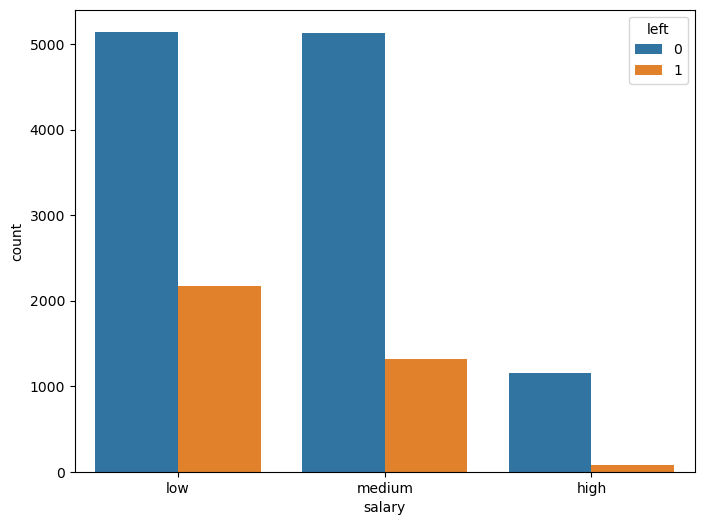

In [38]:
#Bar plot for salary

plt.figure(figsize=(8,6))
sns.countplot(x='salary',hue='left',data=df)
plt.show()


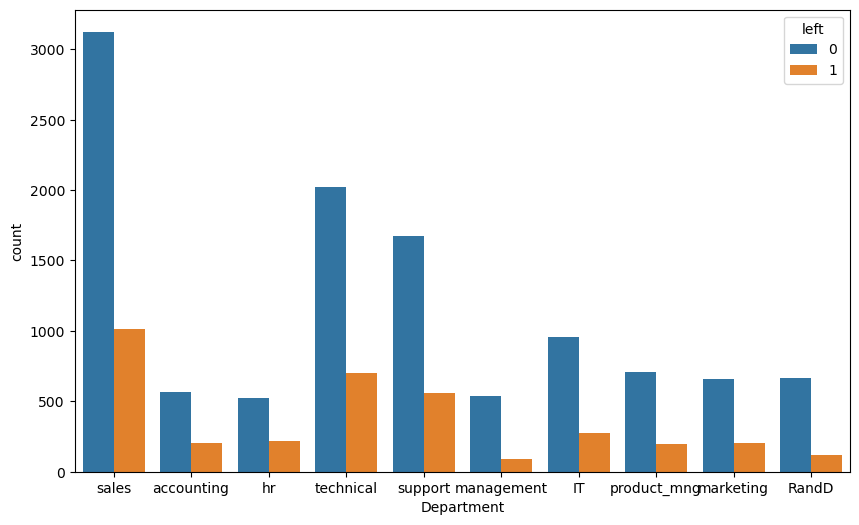

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(x='Department',hue='left',data=df)
plt.show()

In [15]:
df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [21]:
df.groupby('salary').size()

salary
high      1237
low       7316
medium    6446
dtype: int64

In [28]:
from sklearn.utils import resample
df_low=df[(df['salary']=="low")]
df_med=df[(df['salary']=="medium")]
df_high=df[(df["salary"]=="high")]

df_med_us=resample(df_med,replace=True,n_samples=7316,random_state=42)
df_high_us=resample(df_high,replace=True,n_samples=7316,random_state=42)
ds=pd.concat([df_low,df_med_us,df_high_us])

<AxesSubplot:xlabel='salary', ylabel='count'>

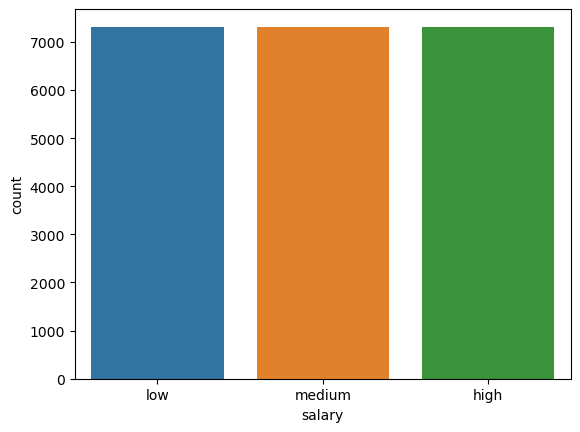

In [31]:
sns.countplot(x='salary',data=ds,order=df['salary'].value_counts().index)

In [34]:
salary = {"low":0,"medium":1,"high":2}
ds['salary']=df['salary'].map(salary)
ds.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0
5,0.41,0.50,2,153,3,0,1,0,sales,0
6,0.10,0.77,6,247,4,0,1,0,sales,0


In [36]:
ds.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.108464,-0.144667,0.001868,-0.106616,0.044367,-0.351132,0.022319,0.060575
last_evaluation,0.108464,1.000000,0.278716,0.304824,0.081494,-0.006367,0.000222,-0.015231,-0.027345
number_project,-0.144667,0.278716,1.000000,0.349155,0.155831,-0.007115,0.018372,-0.008627,-0.014763
average_montly_hours,0.001868,0.304824,0.349155,1.000000,0.080751,-0.024946,0.056700,-0.008802,-0.007763
time_spend_company,-0.106616,0.081494,0.155831,0.080751,1.000000,-0.000073,0.084462,0.160355,0.080432
Work_accident,0.044367,-0.006367,-0.007115,-0.024946,-0.000073,1.000000,-0.139211,0.031220,0.020022
left,-0.351132,0.000222,0.018372,0.056700,0.084462,-0.139211,1.000000,-0.071686,-0.246034
promotion_last_5years,0.022319,-0.015231,-0.008627,-0.008802,0.160355,0.031220,-0.071686,1.000000,0.113365
salary,0.060575,-0.027345,-0.014763,-0.007763,0.080432,0.020022,-0.246034,0.113365,1.000000


<AxesSubplot:>

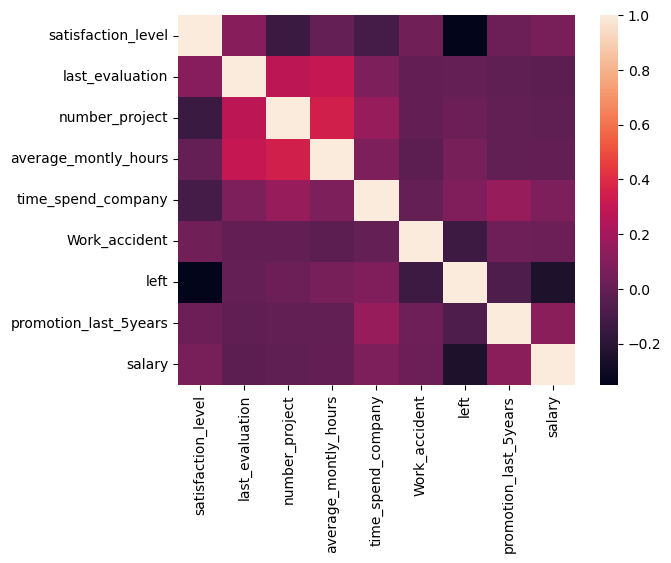

In [37]:
sns.heatmap(ds.corr())

In [59]:
#logistic regression
x = ds.iloc[:,0:6].values
y = ds.iloc[:,6].values




In [60]:
x

array([[  0.38,   0.53,   2.  , 157.  ,   3.  ,   0.  ],
       [  0.72,   0.87,   5.  , 223.  ,   5.  ,   0.  ],
       [  0.37,   0.52,   2.  , 159.  ,   3.  ,   0.  ],
       ...,
       [  0.7 ,   0.74,   3.  , 157.  ,   3.  ,   0.  ],
       [  0.57,   0.61,   2.  , 189.  ,   2.  ,   1.  ],
       [  0.24,   0.39,   4.  , 152.  ,   5.  ,   0.  ]])

In [61]:
y


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [64]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)

x_train: (17558, 6)
x_test: (4390, 6)


In [66]:
model=LogisticRegression(max_iter =800)


In [67]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=800)

In [69]:
y_prediction=model.predict(x_test)

In [70]:
print("accuracy:",accuracy_score(y_test,y_prediction))

accuracy: 0.8241457858769932
